In [5]:
print("""This Cell is necessary or else my IDE will start running cells simultaneously which
      then leads to issues with unfinished imports""")

This Cell is necessary or else my IDE will start running cells simultaneously which
      then leads to issues with unfinished imports


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error


In [7]:
# Load the CSV data
base_name = 'experiment_4'
file_path = f'{base_name}_extrapolation_results.csv'
data = pd.read_csv(file_path)

In [8]:
# Display the loaded data
print("Loaded data:")
print(data)

Loaded data:
   Drop Percentage  Dropped Nodes  Avg Total Nodes Dropped  \
0             10.0              1                     1.59   
1             20.0              2                     3.04   
2             27.0              3                     4.39   
3             35.0              4                     5.64   
4             43.0              5                     6.75   
5             50.0              6                     7.76   
6             65.0              7                     8.68   
7             70.0              8                     9.51   
8             75.0              9                    10.27   

   Actual Drop Percentage  Average Success  Baseline  Difference  
0                9.352941            0.048     0.042       0.006  
1               17.882353            0.053     0.042       0.011  
2               25.823529            0.057     0.042       0.015  
3               33.176471            0.061     0.042       0.019  
4               39.705882      

In [9]:
# Extract the variables for regression
X = data['Actual Drop Percentage'].values.reshape(-1, 1)  # Independent variable
y = data['Average Success'].values  # Dependent variable

In [10]:
# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

r2_linear = r2_score(y, y_pred_linear)
mse_linear = mean_squared_error(y, y_pred_linear)

In [11]:
# 2. Polynomial Regression (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

r2_poly = r2_score(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)

In [12]:
# 3. Logistic Regression (sigmoid function)
from scipy.optimize import curve_fit

# Define the logistic function
def logistic_function(x, L, k, x0):
    """
    Logistic function (sigmoid curve)
    L: the curve's maximum value
    k: the steepness
    x0: the x-value of the sigmoid's midpoint
    """
    return L / (1 + np.exp(-k * (x - x0)))

In [13]:
# Flatten the arrays for curve_fit
X_flat = X.flatten()
    
# Initial parameter estimates
p0 = [0.3, 0.05, 40]  # initial guess for [L, k, x0]
    
# Fit the logistic function
params, params_covariance = curve_fit(logistic_function, X_flat, y, p0=p0)
    
# Extract the parameters
L_fit, k_fit, x0_fit = params
    
# Generate predictions
y_pred_logistic = logistic_function(X_flat, L_fit, k_fit, x0_fit)
    
# Calculate metrics
r2_logistic = r2_score(y, y_pred_logistic)
mse_logistic = mean_squared_error(y, y_pred_logistic)

In [14]:
# 4. Logarithmic Regression
# Define the logarithmic function
def logarithmic_function(x, a, b):
    """
    Logarithmic function of the form: a + b * log(x)
    a: intercept
    b: scaling factor
    """
    # Add a small constant to avoid log(0)
    return a + b * np.log(x + 0.1)

In [15]:
# Flatten arrays for curve_fit
X_flat = X.flatten()

# Initial parameter estimates
p0_log = [0.1, 0.02]  # initial guess for [a, b]

# Fit the logarithmic function
params_log, params_covariance_log = curve_fit(logarithmic_function, X_flat, y, p0=p0_log)

# Extract the parameters
a_fit, b_fit = params_log

# Generate predictions
y_pred_log = logarithmic_function(X_flat, a_fit, b_fit)

# Calculate metrics
r2_log = r2_score(y, y_pred_log)
mse_log = mean_squared_error(y, y_pred_log)

In [16]:
plt.figure(figsize=(12, 8)) 

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

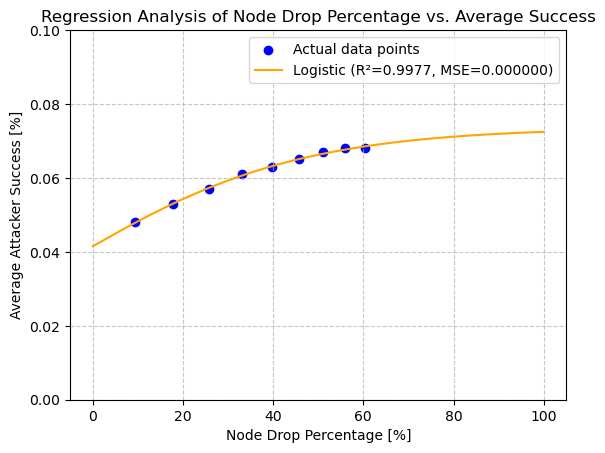

In [17]:
# Create a range of x values for prediction
x_range = np.linspace(0, 100, 100).reshape(-1, 1)

# Generate predictions for the range
y_pred_linear_range = linear_model.predict(x_range)
y_pred_poly_range = poly_model.predict(poly_features.transform(x_range))
y_pred_log_range = logarithmic_function(x_range.flatten(), a_fit, b_fit)
y_pred_logistic_range = logistic_function(x_range.flatten(), L_fit, k_fit, x0_fit)

# Plot the actual data points
plt.ylim(0, 0.1)
plt.scatter(X, y, color='blue', label='Actual data points')

# # Plot the regression lines
# plt.plot(x_range, y_pred_linear_range, color='red', 
#          label=f'Linear (R²={r2_linear:.4f}, MSE={mse_linear:.6f})')

# Plot the logistic regression curve
plt.plot(x_range, y_pred_logistic_range, color='orange', 
         label=f'Logistic (R²={r2_logistic:.4f}, MSE={mse_logistic:.6f})')

# # Plot the logarithmic regression curve
# plt.plot(x_range, y_pred_log_range, color='orange', 
#          label=f'Logarithmic (R²={r2_log:.4f}, MSE={mse_log:.6f})')

# Add labels and title
plt.xlabel('Node Drop Percentage [%]')
plt.ylabel('Average Attacker Success [%]')
plt.title('Regression Analysis of Node Drop Percentage vs. Average Success')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

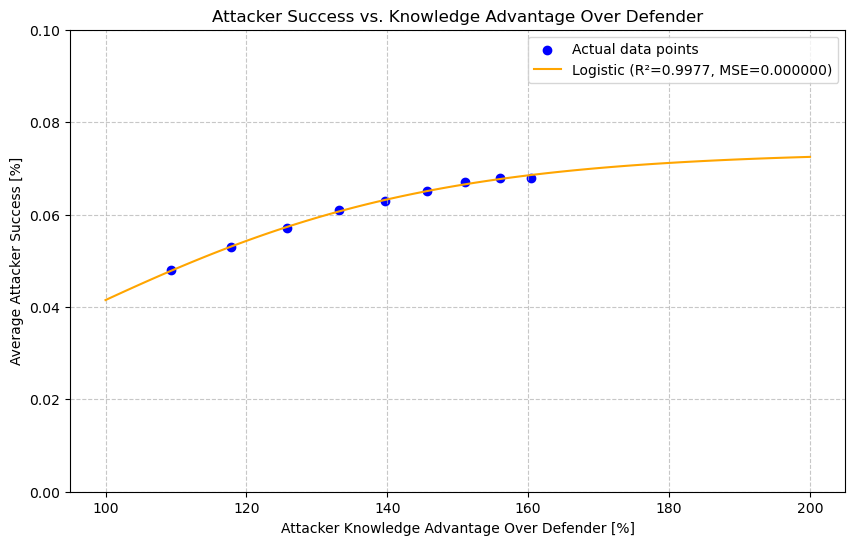

In [18]:
# Create a range of x values for prediction
x_range = np.linspace(0, 100, 100).reshape(-1, 1)

# Generate predictions for the range
y_pred_logistic_range = logistic_function(x_range.flatten(), L_fit, k_fit, x0_fit)

# Create transformed x values (100% + original)
x_transformed = x_range + 100
X_transformed = X + 100

# Plot the actual data points with transformed x values
plt.figure(figsize=(10, 6))
plt.ylim(0, 0.1)
plt.scatter(X_transformed, y, color='blue', label='Actual data points')

# Plot the logistic regression curve with transformed x values
plt.plot(x_transformed, y_pred_logistic_range, color='orange', 
         label=f'Logistic (R²={r2_logistic:.4f}, MSE={mse_logistic:.6f})')

# Add labels and title
plt.xlabel('Attacker Knowledge Advantage Over Defender [%]')
plt.ylabel('Average Attacker Success [%]')
plt.title('Attacker Success vs. Knowledge Advantage Over Defender')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [19]:
def predict_success(drop_percentage, model_type='linear'):
    """
    Predict Average Success for given drop percentage.
    
    Parameters:
    drop_percentage (float or list): The drop percentage(s) to predict for
    model_type (str): 'linear', 'logistic', or 'logarithmic'
    
    Returns:
    float or array: Predicted Average Success value(s)
    """
    # Convert to numpy array if it's a list
    if isinstance(drop_percentage, list):
        dp_array = np.array(drop_percentage)
    else:
        dp_array = np.array([drop_percentage])
    
    if model_type.lower() == 'linear':
        return linear_model.predict(dp_array.reshape(-1, 1))
    elif model_type.lower() == 'logistic':
        return logistic_function(dp_array, L_fit, k_fit, x0_fit)
    elif model_type.lower() == 'logarithmic':
        return logarithmic_function(dp_array, a_fit, b_fit)
    else:
        raise ValueError("Model type must be 'linear', 'logistic', or 'logarithmic'")

In [20]:
# Example usage of the prediction function - Logistic Regression only
test_percentages = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print("\nPredictions for test percentages (Logistic Regression):")
print("Drop Percentage | Logistic Prediction")
print("-" * 40)

for percentage in test_percentages:
    logistic_pred = predict_success(percentage, 'logistic')[0]
    print(f"{percentage:14} | {logistic_pred:.6f}")


Predictions for test percentages (Logistic Regression):
Drop Percentage | Logistic Prediction
----------------------------------------
            10 | 0.048272
            20 | 0.054295
            30 | 0.059311
            40 | 0.063274
            50 | 0.066276
            60 | 0.068479
            70 | 0.070057
            80 | 0.071169
            90 | 0.071942
           100 | 0.072477


In [21]:
# # Show the plot
# plt.tight_layout()
# plt.savefig('regression_plot.png')  # Save the plot to a file
# plt.show()

# Print the model equations
linear_slope = linear_model.coef_[0]
linear_intercept = linear_model.intercept_
# print("\nLinear Regression Equation:")
# print(f"Average Success = {linear_slope:.6f} × (Actual Drop Percentage) + {linear_intercept:.6f}")

print("\nLogistic Regression Equation:")
print(f"Average Success = {L_fit:.6f} / (1 + exp(-{k_fit:.6f} × (Actual Drop Percentage - {x0_fit:.6f})))")

# print("\nLogarithmic Regression Equation:")
# print(f"Average Success = {a_fit:.6f} + {b_fit:.6f} × log(Actual Drop Percentage + 0.1)")


Logistic Regression Equation:
Average Success = 0.073627 / (1 + exp(-0.038878 × (Actual Drop Percentage - -6.560861)))


In [22]:
# Save predictions and coefficients to log file
log_file_path = f"{base_name}_regression_results.log"
with open(log_file_path, 'w') as log_file:
    log_file.write(f"===== REGRESSION RESULTS FOR {base_name} =====\n\n")
    
    # Save logistic regression equation parameters
    log_file.write("LOGISTIC REGRESSION EQUATION PARAMETERS:\n")
    log_file.write(f"L (curve's maximum value): {L_fit:.6f}\n")
    log_file.write(f"k (steepness): {k_fit:.6f}\n")
    log_file.write(f"x0 (sigmoid's midpoint): {x0_fit:.6f}\n\n")
    log_file.write(f"Equation: Average Success = {L_fit:.6f} / (1 + exp(-{k_fit:.6f} × (Actual Drop Percentage - {x0_fit:.6f})))\n\n")
    
    # Save logistic regression predictions
    log_file.write("LOGISTIC REGRESSION PREDICTIONS:\n")
    log_file.write("Drop Percentage | Logistic Prediction\n")
    log_file.write("-" * 40 + "\n")
    for percentage in test_percentages:
        logistic_pred = predict_success(percentage, 'logistic')[0]
        log_file.write(f"{percentage:14} | {logistic_pred:.6f}\n")
    
    # Save metrics
    log_file.write(f"\nMETRICS:\n")
    log_file.write(f"R-squared: {r2_logistic:.6f}\n")
    log_file.write(f"Mean Squared Error: {mse_logistic:.6f}\n")

print(f"\nResults saved to {log_file_path}")


Results saved to experiment_4_regression_results.log
